<a href="https://colab.research.google.com/github/shubhamksingh1/Sentiment_Classification/blob/main/Notebooks/Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install library

In [ ]:
! pip install -q transformers datasets

# Import Library

In [ ]:
from datasets import load_dataset
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', 400)

In [ ]:
from textblob import TextBlob

# Load Data

In [ ]:
dataset = load_dataset("SetFit/sst5")

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 8544
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2210
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1101
    })
})

In [ ]:
train_data = pd.DataFrame(dataset['train'])
test_data = pd.DataFrame(dataset['test'])
validation_data = pd.DataFrame(dataset['validation'])

Creating Column With Len of each text 

In [ ]:
train_data['len'] = train_data['text'].str.len()
test_data['len'] = test_data['text'].str.len()
validation_data['len'] = validation_data['text'].str.len()

In [ ]:
ind_2_text_sentiment = {0 : "very negative",1: "negative",2 : "neutral", 3 : "positive", 4 :"very positive"}

In [ ]:
categories = list(ind_2_text_sentiment.values())

# Data Preprocessing and EDA

## Utility Functions
1. For checking data distribution among classes 
2. Length Distribution of Text Per Class

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
from tabulate import tabulate


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def univariate_categorical(df,x):
       
    print('\nNumber of unique values => ' + str(len(df[x].unique())) + '\n\n')

    plt.figure(figsize=(10, 10))
    
    y = "count"
    plt.subplot(2, 1, 1)
    plt.xticks(rotation=90)

    sns.countplot(df[x])
    count_df = df[x].value_counts().rename(y).reset_index().rename(columns={"index":x})
    y = "percent(%)"
    percent_df = df[x].value_counts(normalize=True).rename(y).reset_index().rename(columns={"index":x})
    plt.subplot(2, 1, 2)
    sns.barplot(percent_df[x], percent_df[y], data=percent_df)
    plt.xticks(rotation=90)
    plt.show()
    print(tabulate(pd.merge(percent_df, count_df, how='inner'), headers='keys', tablefmt='fancy_grid'))


In [ ]:
def bivariate_categorical(df,x_col,y_col):
    #define plotting region (2 rows, 2 columns)
    fig, axes = plt.subplots(2, 2, figsize=(24,24))
    plt.xticks(rotation=90)
    sns.boxplot(x=x_col,y=y_col,data=df,palette='rainbow',ax=axes[0,0])
    sns.violinplot(x=x_col, y=y_col, data=df,palette='rainbow',ax=axes[0,1])
    sns.stripplot(x=x_col,y=y_col, data=df,ax=axes[1,0])
    sns.swarmplot(x=x_col,y=y_col, data=df,ax=axes[1,1])
    plt.show()

## Train Data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        8544 non-null   object
 1   label       8544 non-null   int64 
 2   label_text  8544 non-null   object
 3   len         8544 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 267.1+ KB


In [ ]:
train_data.head(500)

,text,label,label_text,len
0,"a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films",4,very positive,103
1,apparently reassembled from the cutting-room floor of any given daytime soap .,1,negative,78
2,"they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes .",1,negative,225
3,the entire movie is filled with deja vu moments .,2,neutral,49
4,"this is a visually stunning rumination on love , memory , history and the war between art and commerce .",3,positive,104
5,"um , no. .",2,neutral,10
6,jonathan parker 's bartleby should have been the be-all-end-all of the modern-office anomie films .,3,positive,99
7,campanella gets the tone just right -- funny in the middle of sad in the middle of hopeful .,3,positive,92
8,a fan film that for the uninitiated plays better on video with the sound turned down .,1,negative,86
9,"béart and berling are both superb , while huppert ... is magnificent .",4,very positive,70


In [ ]:
train_data.shape

(8544, 4)

In [ ]:
train_data.isna().sum()

text          0
label         0
label_text    0
len           0
dtype: int64

### Visualizing Length Distribution of Text Per Class

In [ ]:
train_data.len.describe()

count    8544.000000
mean      102.655431
std        51.685130
min         4.000000
25%        62.000000
50%        98.000000
75%       137.000000
max       283.000000
Name: len, dtype: float64

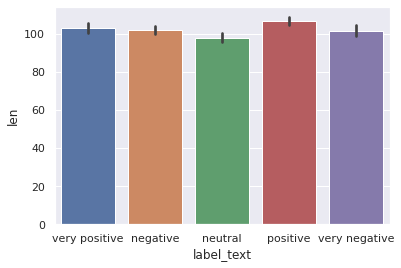

In [ ]:
sns.barplot(x='label_text',y='len',data=train_data)

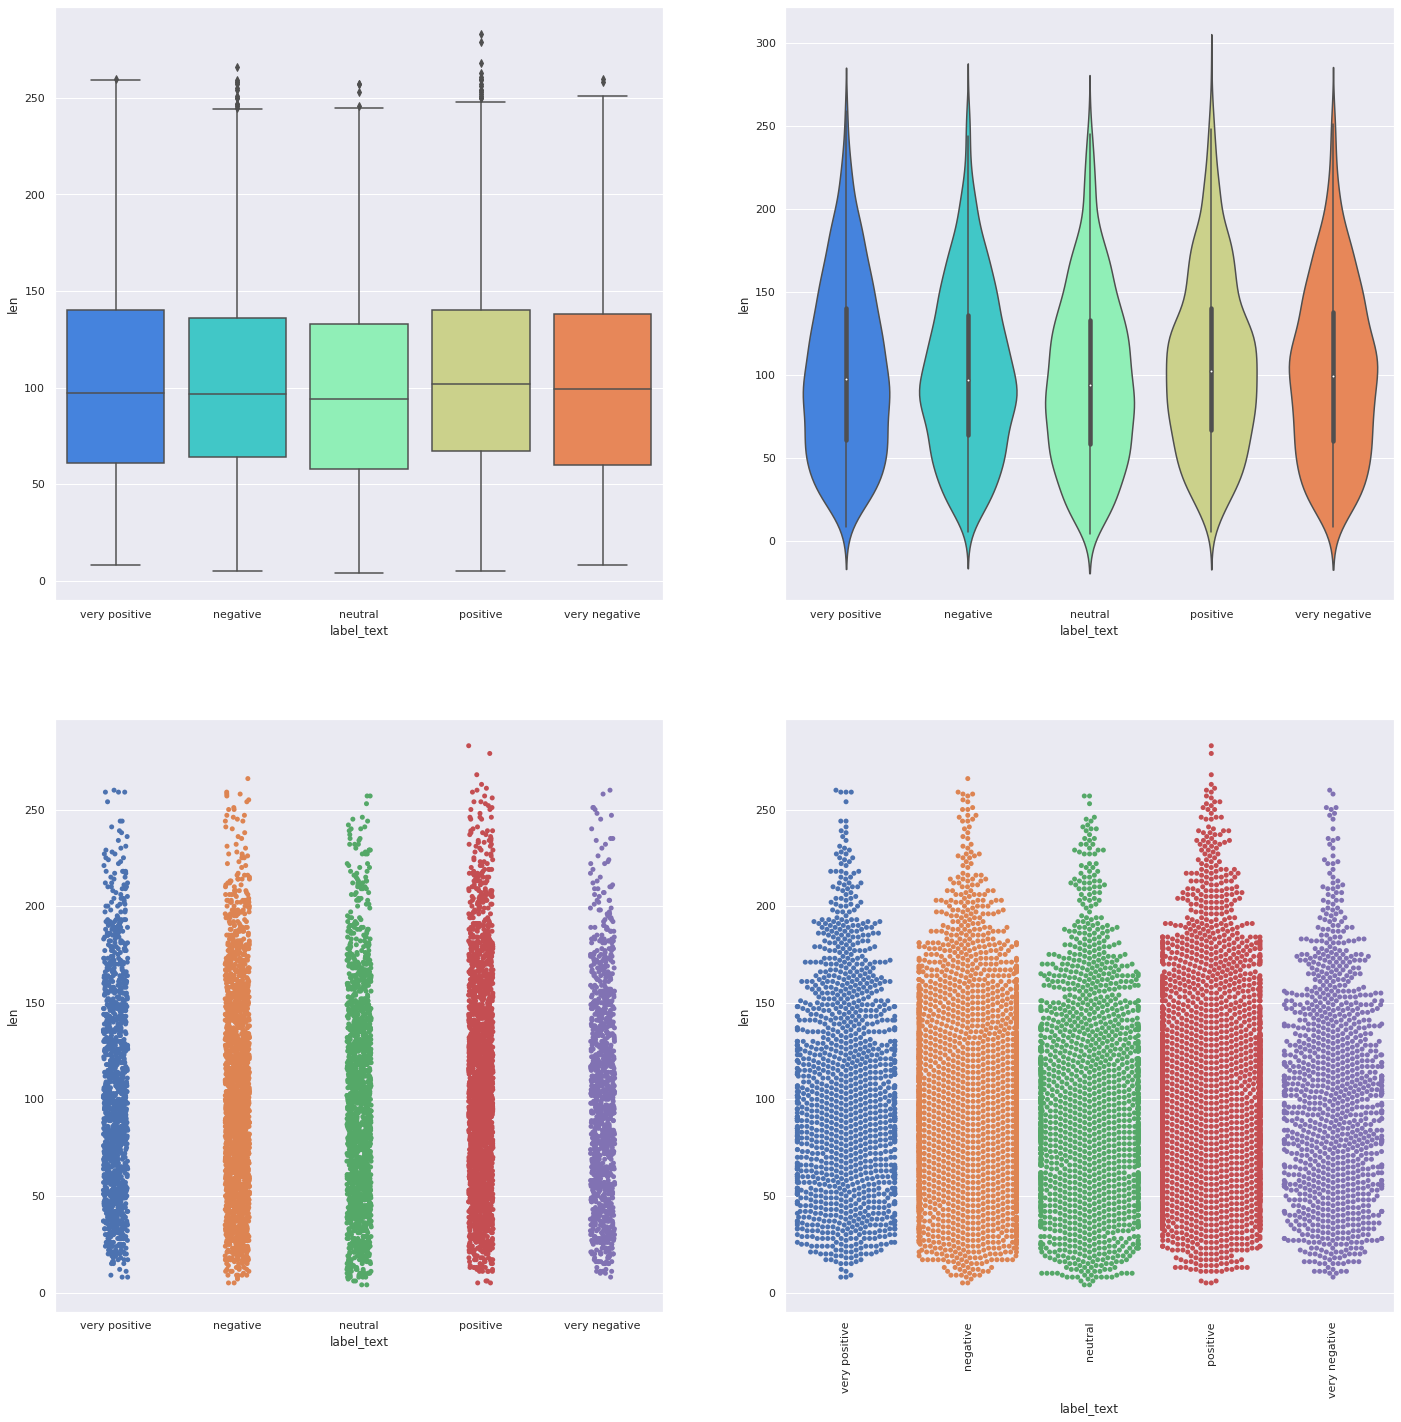

In [ ]:
bivariate_categorical(train_data,"label_text","len")

In [ ]:
temp_train = train_data.sort_values(['len'], ascending=True)
for cat in categories:
    print("\n\n")
    display(temp_train[temp_train['label_text'] == cat].head(50))

,text,label,label_text,len
6007,crummy .,0,very negative,8
1906,horrible .,0,very negative,10
2357,terrible .,0,very negative,10
555,stay away .,0,very negative,11
8352,execrable .,0,very negative,11
5533,it sucked .,0,very negative,11
7352,is a mess .,0,very negative,11
750,bad movie .,0,very negative,11
5469,disgusting .,0,very negative,12
6590,thumbs down .,0,very negative,13


,text,label,label_text,len
128,why ?,1,negative,5
1139,no. .,1,negative,5
7480,weird .,1,negative,7
6424,a mess .,1,negative,8
7791,but no. .,1,negative,9
2464,obvious .,1,negative,9
31,too bad .,1,negative,9
4956,shallow .,1,negative,9
1348,too bad .,1,negative,9
3576,he fails .,1,negative,10


,text,label,label_text,len
8291,go .,2,neutral,4
3558,eh .,2,neutral,4
7837,bang !,2,neutral,6
4933,a. . .,2,neutral,6
7229,c'mon !,2,neutral,7
4005,spy-vs .,2,neutral,8
2245,almost .,2,neutral,8
6702,ending .,2,neutral,8
5094,barely .,2,neutral,8
3360,please .,2,neutral,8


,text,label,label_text,len
2473,yes .,3,positive,5
411,wow .,3,positive,5
3549,cool .,3,positive,6
2964,zoom !,3,positive,6
2221,and it is .,3,positive,11
5702,i like it .,3,positive,11
5224,rewarding .,3,positive,11
1703,i like it .,3,positive,11
3037,i will be .,3,positive,11
38,a fun ride .,3,positive,12


,text,label,label_text,len
1489,see it .,4,very positive,8
3274,see it .,4,very positive,8
866,amazing !,4,very positive,9
1262,fantastic !,4,very positive,11
7134,refreshing .,4,very positive,12
510,delirious fun .,4,very positive,15
738,morvern rocks .,4,very positive,15
8414,spiderman rocks,4,very positive,15
7227,smart and taut .,4,very positive,16
461,fun and nimble .,4,very positive,16


many of the really short text examples belong to the neutral class 

### Data Distribution

In [ ]:
train_data.label_text.value_counts()

positive         2322
negative         2218
neutral          1624
very positive    1288
very negative    1092
Name: label_text, dtype: int64

In [ ]:
train_data.label.value_counts()

3    2322
1    2218
2    1624
4    1288
0    1092
Name: label, dtype: int64


Number of unique values => 5




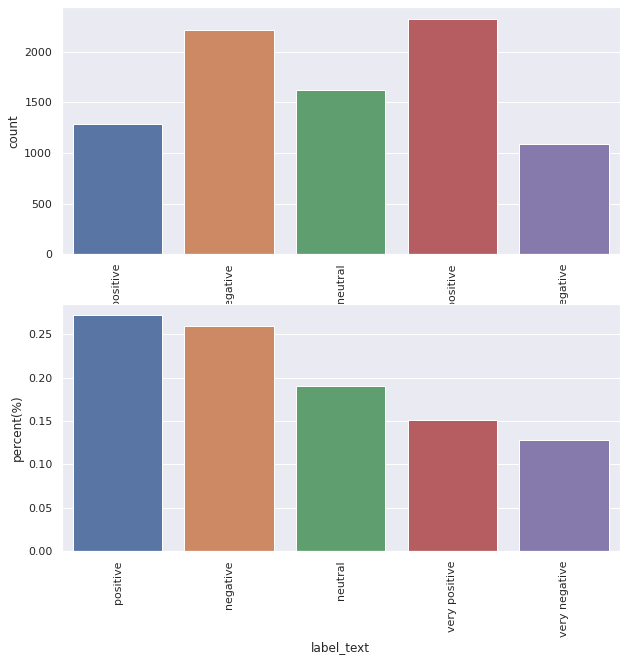

╒════╤═══════════════╤══════════════╤═════════╕
│    │ label_text    │   percent(%) │   count │
╞════╪═══════════════╪══════════════╪═════════╡
│  0 │ positive      │     0.27177  │    2322 │
├────┼───────────────┼──────────────┼─────────┤
│  1 │ negative      │     0.259597 │    2218 │
├────┼───────────────┼──────────────┼─────────┤
│  2 │ neutral       │     0.190075 │    1624 │
├────┼───────────────┼──────────────┼─────────┤
│  3 │ very positive │     0.150749 │    1288 │
├────┼───────────────┼──────────────┼─────────┤
│  4 │ very negative │     0.127809 │    1092 │
╘════╧═══════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(train_data,'label_text')

We observe that ~12% of the examples are from the very negative class, which is important to take into account while evaluating classifier accuracy.

Also, the data labels are not perfect the SST dataset was labelled by human annotators via Amazon Mechanical Turk,so it is subject to human perceptions and biases

Also the reviews can be
1.  sarcastic some time, 
2. can be 1 word review too.

## Test Data

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        2210 non-null   object
 1   label       2210 non-null   int64 
 2   label_text  2210 non-null   object
 3   len         2210 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 69.2+ KB


In [ ]:
test_data.head(500)

,text,label,label_text,len
0,"no movement , no yuks , not much of anything .",1,negative,46
1,"a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crème brûlée .",0,very negative,134
2,` how many more voyages can this limping but dearly-loved franchise survive ? ',2,neutral,79
3,so relentlessly wholesome it made me want to swipe something .,2,neutral,62
4,"gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .",0,very negative,121
5,"we never really feel involved with the story , as all of its ideas remain just that : abstract ideas .",0,very negative,102
6,this is one of polanski 's best films .,4,very positive,39
7,take care of my cat offers a refreshingly different slice of asian cinema .,3,positive,75
8,"acting , particularly by tambor , almost makes `` never again '' worthwhile , but -lrb- writer\/director -rrb- schaeffer should follow his titular advice",1,negative,153
9,the movie exists for its soccer action and its fine acting .,3,positive,60


In [ ]:
test_data.shape

(2210, 4)

In [ ]:
test_data.isna().sum()

text          0
label         0
label_text    0
len           0
dtype: int64

### Visualizing Length Distribution of Text Per Class

In [ ]:
test_data.len.describe()

count    2210.000000
mean      102.711312
std        49.473515
min         5.000000
25%        64.000000
50%        99.000000
75%       136.000000
max       256.000000
Name: len, dtype: float64

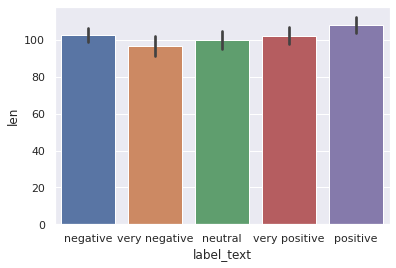

In [ ]:
sns.barplot(x='label_text',y='len',data=test_data)

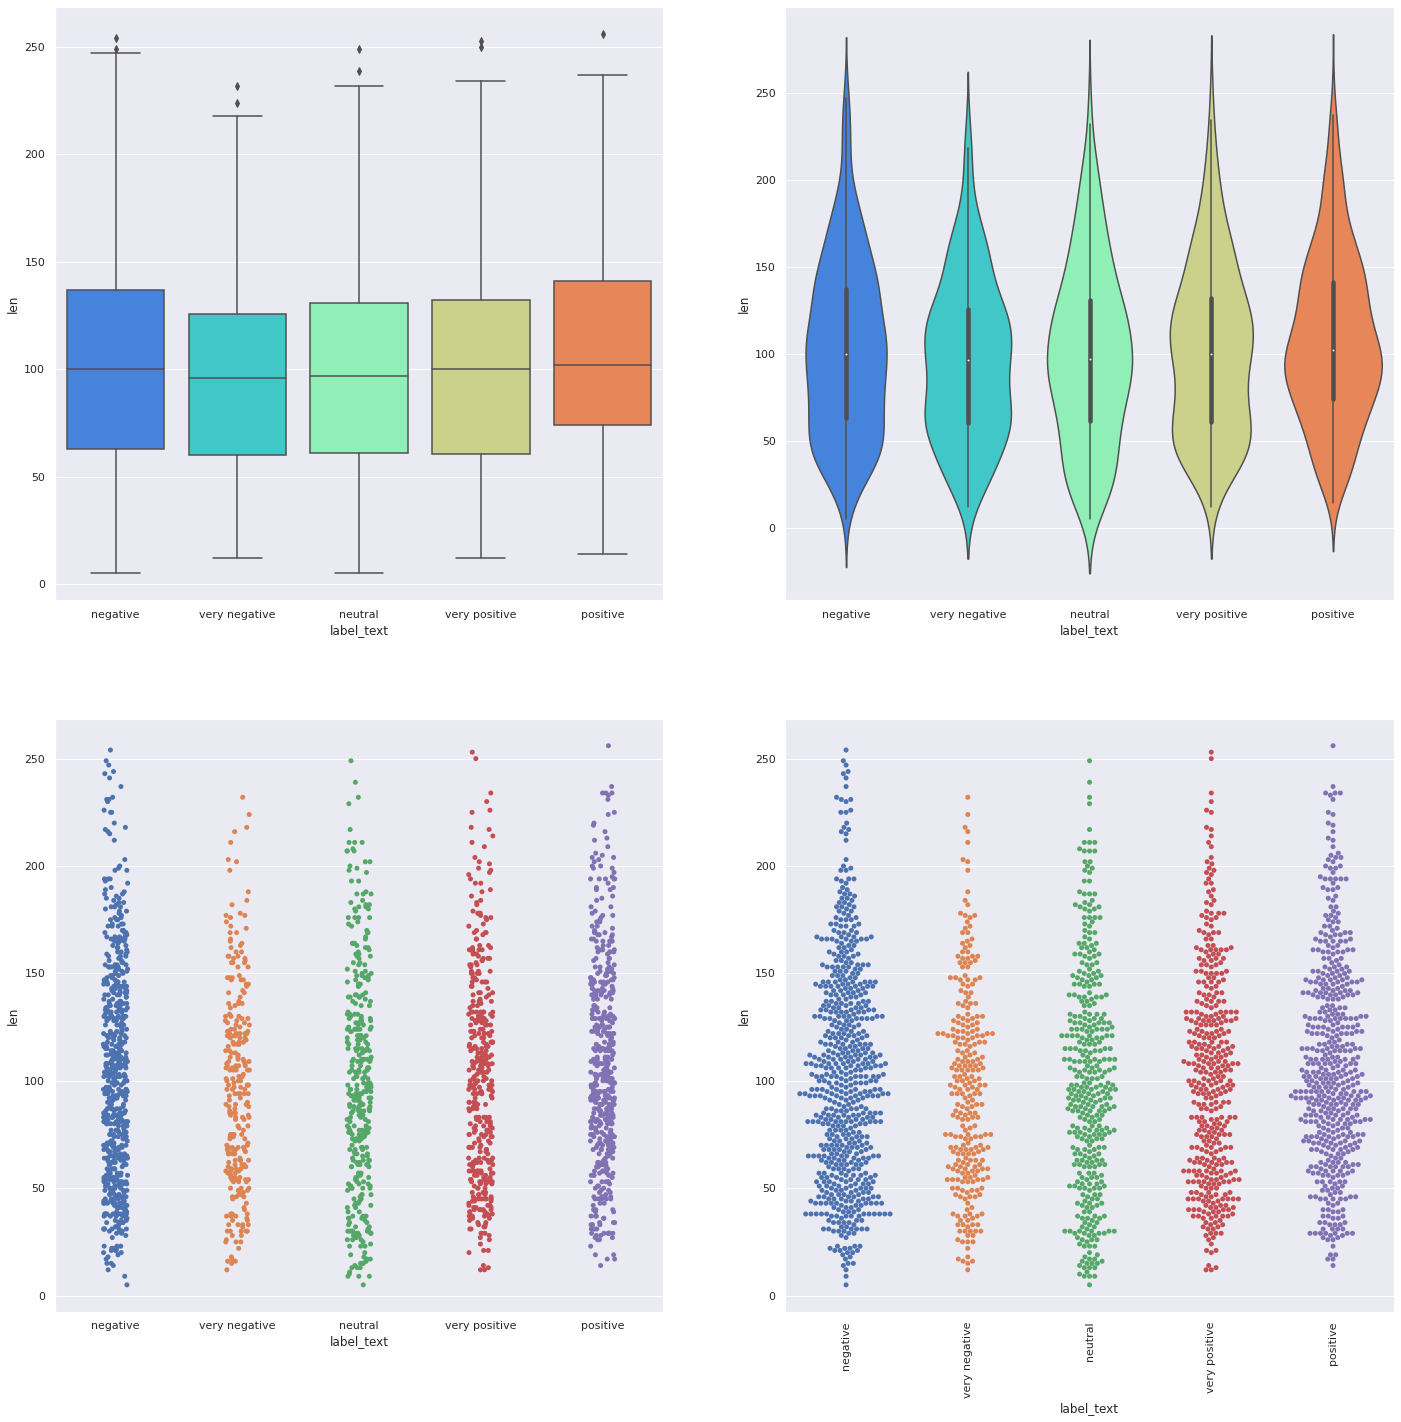

In [ ]:
bivariate_categorical(test_data,"label_text","len")

In [ ]:
temp_test = test_data.sort_values(['len'], ascending=True)
for cat in categories:
    print("\n\n")
    display(temp_test[temp_test['label_text'] == cat].head(50))

,text,label,label_text,len
179,ridiculous .,0,very negative,12
1394,it 's painful .,0,very negative,15
813,extremely dumb .,0,very negative,16
1762,a real clunker .,0,very negative,16
1579,a very bad sign .,0,very negative,17
949,extremely boring .,0,very negative,18
317,so what is the point ?,0,very negative,22
463,the ending is a cop-out .,0,very negative,25
1808,do n't waste your money .,0,very negative,25
994,"a sour , nasty offering .",0,very negative,25


,text,label,label_text,len
180,no. .,1,negative,5
550,no more .,1,negative,9
240,moot point .,1,negative,12
1959,bears is bad .,1,negative,14
1539,but i was n't .,1,negative,15
1414,"sorry , charlie",1,negative,15
202,i hate this movie,1,negative,17
1724,is this progress ?,1,negative,18
237,boring we did n't .,1,negative,19
848,just a bloody mess .,1,negative,20


,text,label,label_text,len
1318,hmm .,2,neutral,5
918,brimful .,2,neutral,9
2134,hopkins .,2,neutral,9
1789,you bet .,2,neutral,9
77,big deal !,2,neutral,10
542,it is now .,2,neutral,11
1206,immediately .,2,neutral,13
254,no question .,2,neutral,13
1125,or a profit .,2,neutral,13
345,i wonder why .,2,neutral,14


,text,label,label_text,len
1751,what 's next ?,3,positive,14
1086,he 's super spy !,3,positive,17
1434,is n't it great ?,3,positive,17
1311,it 's astonishing .,3,positive,19
987,it 's like a poem .,3,positive,19
2148,tailored to entertain !,3,positive,23
485,not a bad journey at all .,3,positive,26
2000,it 's still worth a look .,3,positive,26
844,worth the effort to watch .,3,positive,27
2027,it has fun being grown up .,3,positive,27


,text,label,label_text,len
763,i loved it !,4,very positive,12
284,good movie .,4,very positive,12
764,brilliant ! ',4,very positive,13
1878,good actress .,4,very positive,14
1046,a very funny movie .,4,very positive,20
1777,go see it and enjoy .,4,very positive,21
278,well worth the time .,4,very positive,21
52,much monkeyfun for all .,4,very positive,24
336,this is one for the ages .,4,very positive,26
892,i admired this work a lot .,4,very positive,27


many of the really short text examples belong to the neutral class 

### Data Distribution

In [ ]:
test_data.label_text.value_counts()

negative         633
positive         510
very positive    399
neutral          389
very negative    279
Name: label_text, dtype: int64


Number of unique values => 5




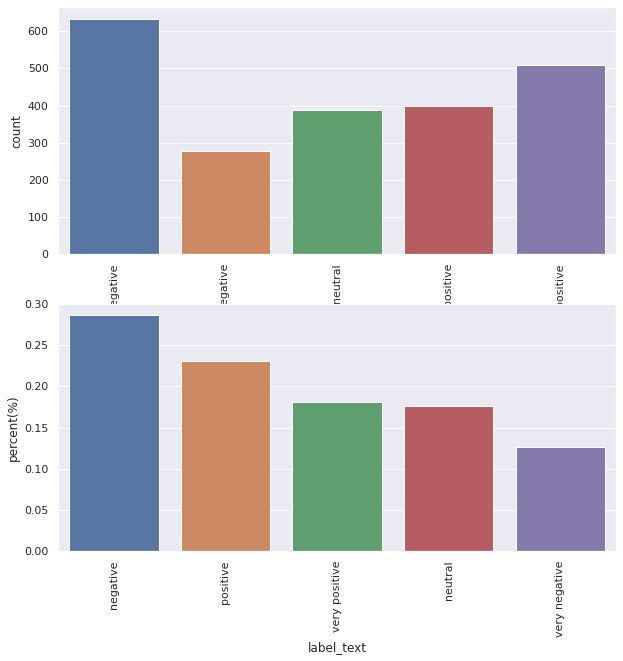

╒════╤═══════════════╤══════════════╤═════════╕
│    │ label_text    │   percent(%) │   count │
╞════╪═══════════════╪══════════════╪═════════╡
│  0 │ negative      │     0.286425 │     633 │
├────┼───────────────┼──────────────┼─────────┤
│  1 │ positive      │     0.230769 │     510 │
├────┼───────────────┼──────────────┼─────────┤
│  2 │ very positive │     0.180543 │     399 │
├────┼───────────────┼──────────────┼─────────┤
│  3 │ neutral       │     0.176018 │     389 │
├────┼───────────────┼──────────────┼─────────┤
│  4 │ very negative │     0.126244 │     279 │
╘════╧═══════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(test_data,'label_text')

## Validation Data

In [ ]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1101 non-null   object
 1   label       1101 non-null   int64 
 2   label_text  1101 non-null   object
 3   len         1101 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 34.5+ KB


In [ ]:
validation_data.head(500)

,text,label,label_text,len
0,"in his first stab at the form , jacquot takes a slightly anarchic approach that works only sporadically .",2,neutral,105
1,one long string of cliches .,1,negative,28
2,"if you 've ever entertained the notion of doing what the title of this film implies , what sex with strangers actually shows may put you off the idea forever .",1,negative,159
3,k-19 exploits our substantial collective fear of nuclear holocaust to generate cheap hollywood tension .,0,very negative,104
4,"it 's played in the most straight-faced fashion , with little humor to lighten things up .",1,negative,90
5,"there is a fabric of complex ideas here , and feelings that profoundly deepen them .",3,positive,84
6,"it may seem long at 110 minutes if you 're not a fan , because it includes segments of 12 songs at a reunion concert .",2,neutral,118
7,"while the stoically delivered hokum of hart 's war is never fun , it 's still a worthy addition to the growing canon of post-saving private ryan tributes to the greatest generation .",2,neutral,182
8,"although laced with humor and a few fanciful touches , the film is a refreshingly serious look at young women .",3,positive,111
9,it all feels like a monty python sketch gone horribly wrong .,0,very negative,61


In [ ]:
validation_data.shape

(1101, 4)

In [ ]:
validation_data.isna().sum()

text          0
label         0
label_text    0
len           0
dtype: int64

### Visualizing Length Distribution of Text Per Class

In [ ]:
validation_data.len.describe()

count    1101.000000
mean      103.477748
std        48.873703
min         5.000000
25%        66.000000
50%       100.000000
75%       137.000000
max       254.000000
Name: len, dtype: float64

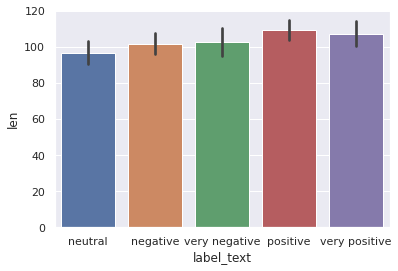

In [ ]:
sns.barplot(x='label_text',y='len',data=validation_data)

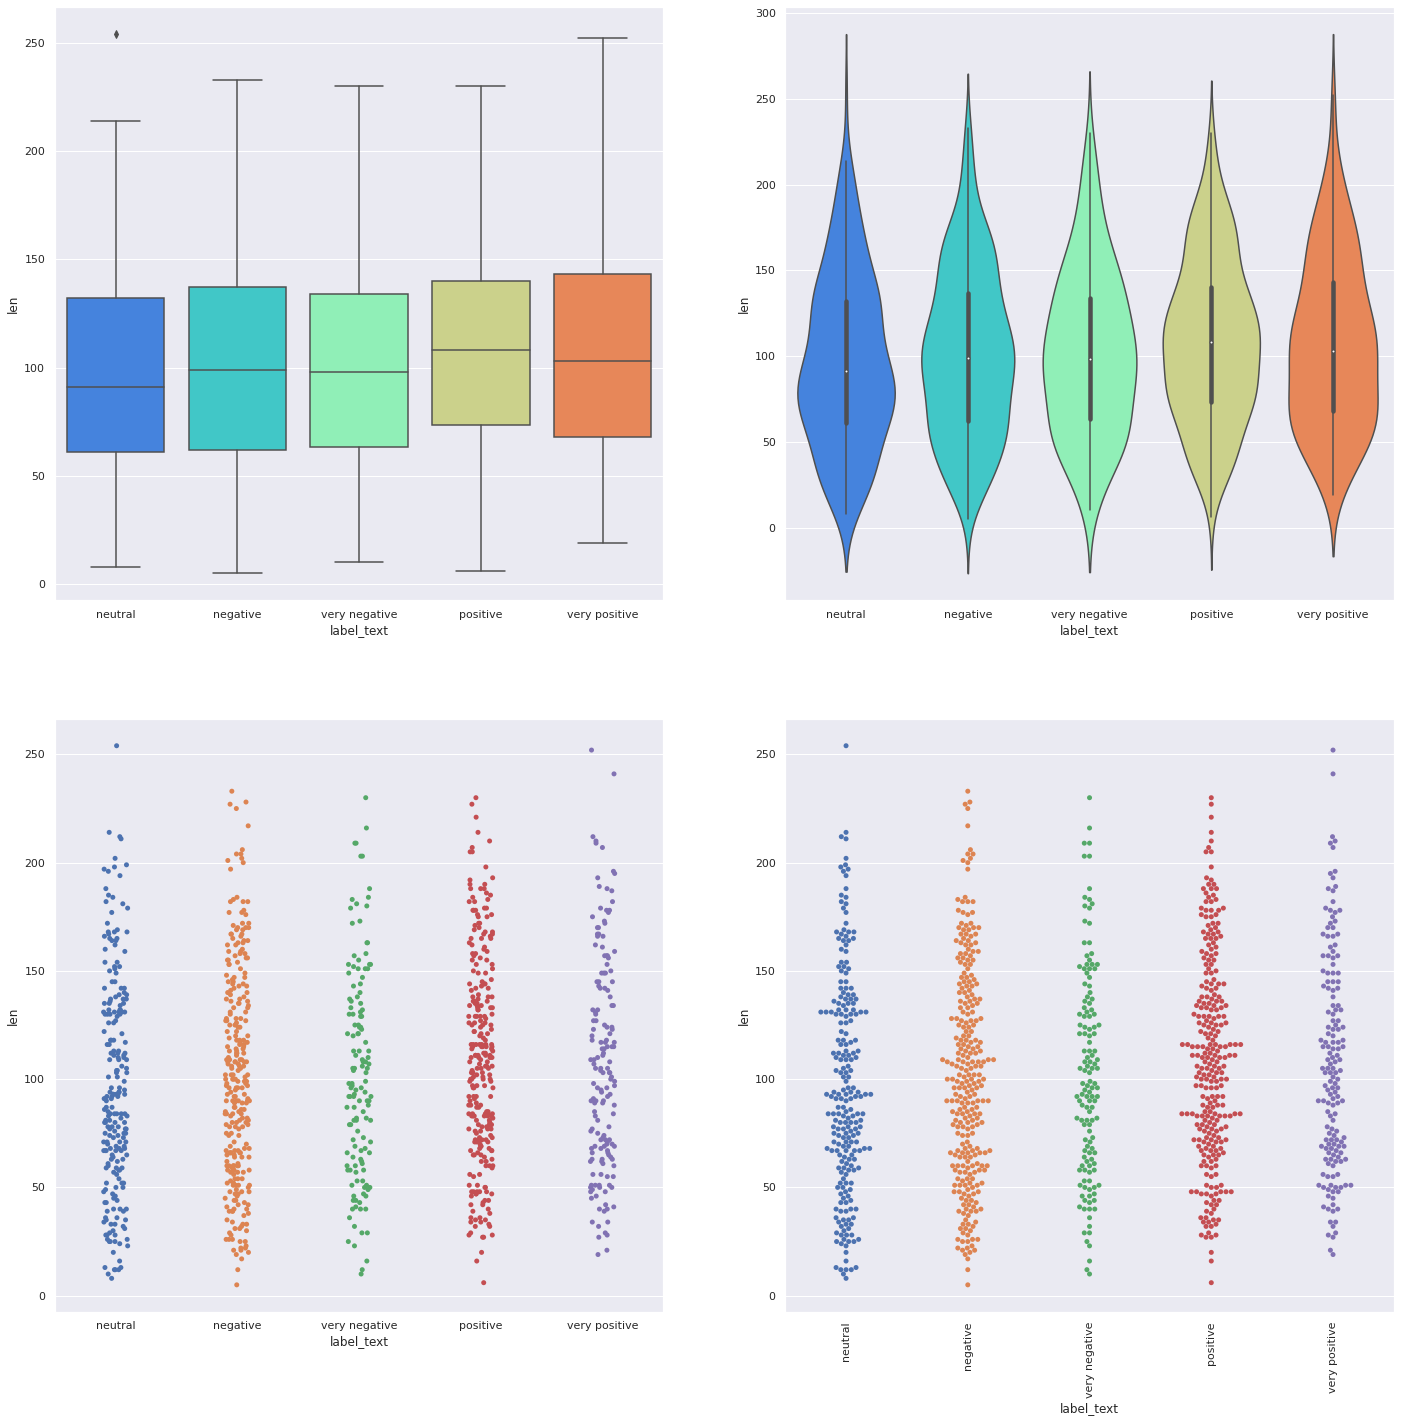

In [ ]:
bivariate_categorical(validation_data,"label_text","len")

In [ ]:
temp_validation = validation_data.sort_values(['len'], ascending=True)
for cat in categories:
    print("\n\n")
    display(temp_validation[temp_validation['label_text'] == cat].head(50))

,text,label,label_text,len
748,very bad .,0,very negative,10
343,"yes , dull .",0,very negative,12
817,this is so bad .,0,very negative,16
653,big fat waste of time .,0,very negative,23
1067,how do you spell cliché ?,0,very negative,25
710,almost gags on its own gore .,0,very negative,29
986,it treats women like idiots .,0,very negative,29
595,"it 's slow -- very , very slow .",0,very negative,32
174,has all the depth of a wading pool .,0,very negative,36
69,i do n't think i laughed out loud once .,0,very negative,40


,text,label,label_text,len
1045,bad .,1,negative,5
759,oh come on .,1,negative,12
67,that 's a cheat .,1,negative,17
176,it 's just filler .,1,negative,19
804,it 's a buggy drag .,1,negative,20
170,fancy a real downer ?,1,negative,21
1051,just not campy enough,1,negative,21
344,that 's pure pr hype .,1,negative,22
223,do not see this film .,1,negative,22
365,or emptying rat traps .,1,negative,23


,text,label,label_text,len
628,at all .,2,neutral,8
367,under 15 ?,2,neutral,10
619,hey arnold !,2,neutral,12
795,hey arnold !,2,neutral,12
342,this is it .,2,neutral,12
331,is not easy .,2,neutral,13
93,over age 15 ?,2,neutral,13
905,long time dead ?,2,neutral,16
1009,part three stooges .,2,neutral,20
635,what time is it there ?,2,neutral,23


,text,label,label_text,len
107,cool ?,3,positive,6
834,it 's fun lite .,3,positive,16
815,one from the heart .,3,positive,20
523,"good film , but very glum .",3,positive,27
352,it 's a beautiful madness .,3,positive,27
100,it all adds up to good fun .,3,positive,28
819,ahhhh ... revenge is sweet !,3,positive,28
419,funny but perilously slight .,3,positive,29
770,slick piece of cross-promotion .,3,positive,32
484,"a quiet , pure , elliptical film",3,positive,32


,text,label,label_text,len
1070,a giggle a minute .,4,very positive,19
44,lovely and poignant .,4,very positive,21
282,"a smart , witty follow-up .",4,very positive,27
177,a deep and meaningful film .,4,very positive,28
34,people cinema at its finest .,4,very positive,29
392,"a warm , funny , engaging film .",4,very positive,32
913,old-form moviemaking at its best .,4,very positive,34
290,"it 's also , clearly , great fun .",4,very positive,34
309,an exquisitely crafted and acted tale .,4,very positive,39
193,the film 's performances are thrilling .,4,very positive,40


many of the really short text examples belong to the neutral class 

### Data Distribution

In [ ]:
validation_data.label_text.value_counts()

negative         289
positive         279
neutral          229
very positive    165
very negative    139
Name: label_text, dtype: int64


Number of unique values => 5




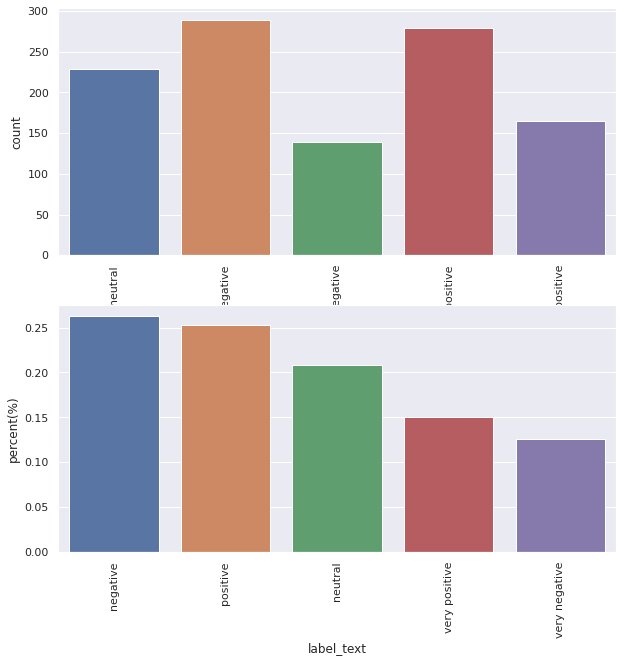

╒════╤═══════════════╤══════════════╤═════════╕
│    │ label_text    │   percent(%) │   count │
╞════╪═══════════════╪══════════════╪═════════╡
│  0 │ negative      │     0.262489 │     289 │
├────┼───────────────┼──────────────┼─────────┤
│  1 │ positive      │     0.253406 │     279 │
├────┼───────────────┼──────────────┼─────────┤
│  2 │ neutral       │     0.207993 │     229 │
├────┼───────────────┼──────────────┼─────────┤
│  3 │ very positive │     0.149864 │     165 │
├────┼───────────────┼──────────────┼─────────┤
│  4 │ very negative │     0.126249 │     139 │
╘════╧═══════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(validation_data,'label_text')

# Models

## Rule Based Models

### TextBlob

In [ ]:
def textblob_score(sentence):
    return TextBlob(sentence).sentiment.polarity        # returns sentiment [-1,1]


In [ ]:
test_data

,text,label,label_text,len
0,"no movement , no yuks , not much of anything .",1,negative,46
1,"a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crème brûlée .",0,very negative,134
2,` how many more voyages can this limping but dearly-loved franchise survive ? ',2,neutral,79
3,so relentlessly wholesome it made me want to swipe something .,2,neutral,62
4,"gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .",0,very negative,121
...,...,...,...,...
2205,"the problem with concept films is that if the concept is a poor one , there 's no saving the movie .",1,negative,100
2206,"safe conduct , however ambitious and well-intentioned , fails to hit the entertainment bull 's - eye .",1,negative,102
2207,"a film made with as little wit , interest , and professionalism as artistically possible for a slummy hollywood caper flick .",1,negative,125
2208,"to enjoy this movie 's sharp dialogue and delightful performance by jolie and burns , you have to gloss over the no sense ending .",2,neutral,130


In [ ]:
polarity_map_dict = {0 : "very negative",1: "negative",2 : "neutral", 3 : "positive", 4 :"very positive"}

In [ ]:
# Get the polarity
test_data['textblob_score'] = test_data['text'].apply(textblob_score)
# Convert float values to category
test_data['textblob_pred'] = pd.cut(test_data['textblob_score'], bins=5, labels=[0,1,2,3,4])
# Coverting pred label to pred label text
test_data['textblob_pred_cat'] = test_data['textblob_pred'].map(polarity_map_dict)

In [ ]:
test_data.head(100)

,text,label,label_text,len,textblob_score,textblob_pred,textblob_pred_cat
0,"no movement , no yuks , not much of anything .",1,negative,46,-0.100000,2,neutral
1,"a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crème brûlée .",0,very negative,134,0.350000,3,positive
2,` how many more voyages can this limping but dearly-loved franchise survive ? ',2,neutral,79,0.500000,3,positive
3,so relentlessly wholesome it made me want to swipe something .,2,neutral,62,0.000000,2,neutral
4,"gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .",0,very negative,121,-0.012879,2,neutral
5,"we never really feel involved with the story , as all of its ideas remain just that : abstract ideas .",0,very negative,102,-0.100000,2,neutral
6,this is one of polanski 's best films .,4,very positive,39,1.000000,4,very positive
7,take care of my cat offers a refreshingly different slice of asian cinema .,3,positive,75,0.033333,2,neutral
8,"acting , particularly by tambor , almost makes `` never again '' worthwhile , but -lrb- writer\/director -rrb- schaeffer should follow his titular advice",1,negative,153,0.191667,2,neutral
9,the movie exists for its soccer action and its fine acting .,3,positive,60,0.172222,2,neutral


In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinary = LabelBinarizer()
 
labels = labelBinary.fit_transform(test_data['label_text'])

In [ ]:
labelBinary.classes_

array(['negative', 'neutral', 'positive', 'very negative',
       'very positive'], dtype='<U13')

In [ ]:
labels

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
one_hot_label = labelBinary.transform(test_data['textblob_pred_cat'])

In [ ]:
one_hot_label

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
labels.shape

(2210, 5)

In [ ]:
one_hot_label.shape

(2210, 5)

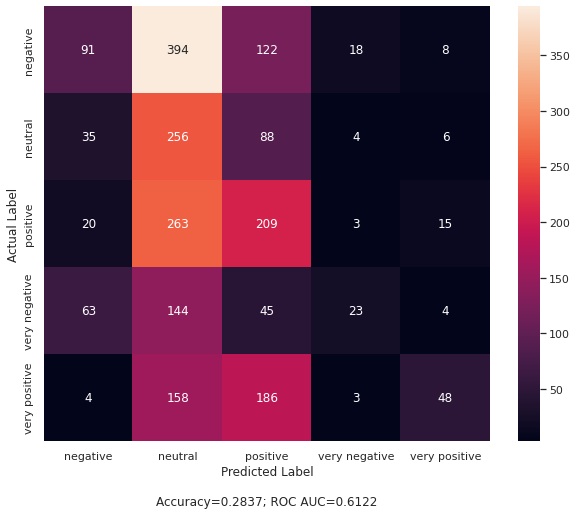

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score


TEST_LABEL = test_data['label_text'].to_list()
PREDICTED_LABEL = test_data['textblob_pred_cat'].to_list()
TEST_LABEL_ONE_HOT = labels
PREDICTED_LABEL_ONE_HOT = one_hot_label


labels = list(labelBinary.classes_)

accuracy = accuracy_score(TEST_LABEL, PREDICTED_LABEL)
roc_score = roc_auc_score(PREDICTED_LABEL_ONE_HOT, TEST_LABEL_ONE_HOT)

conf_mat = confusion_matrix(TEST_LABEL, PREDICTED_LABEL)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label\n\nAccuracy={:0.4f}; ROC AUC={:0.4f}'.format(accuracy, roc_score))
plt.show()

In [ ]:
print(classification_report(TEST_LABEL, PREDICTED_LABEL, target_names=labels))

               precision    recall  f1-score   support

     negative       0.43      0.14      0.22       633
      neutral       0.21      0.66      0.32       389
     positive       0.32      0.41      0.36       510
very negative       0.45      0.08      0.14       279
very positive       0.59      0.12      0.20       399

     accuracy                           0.28      2210
    macro avg       0.40      0.28      0.25      2210
 weighted avg       0.40      0.28      0.25      2210



In [ ]:
labels

['negative', 'neutral', 'positive', 'very negative', 'very positive']

In [ ]:
test_data.label_text.value_counts()

negative         633
positive         510
very positive    399
neutral          389
very negative    279
Name: label_text, dtype: int64

### VADER

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
def score_vader(sentence, vader):
    return vader.polarity_scores(sentence)['compound']   # returns [-1,1]

In [ ]:
test_data.label_text.value_counts()

negative         633
positive         510
very positive    399
neutral          389
very negative    279
Name: label_text, dtype: int64

In [ ]:
test_data.label.value_counts()

1    633
3    510
4    399
2    389
0    279
Name: label, dtype: int64

In [ ]:
polarity_map_dict = {0 : "very negative",1: "negative",2 : "neutral", 3 : "positive", 4 :"very positive"}

In [ ]:
# Get the polarity
test_data['vader_score'] = test_data['text'].apply(lambda x: score_vader(x, vader))
# Convert float values to category
test_data['vader_pred'] = pd.cut(test_data['vader_score'], bins=5, labels=[0,1,2,3,4])
# Coverting pred label to pred label text
test_data['vader_pred_cat'] = test_data['vader_pred'].map(polarity_map_dict)

In [ ]:
test_data.head(100)

,text,label,label_text,len,vader_score,vader_pred,vader_pred_cat
0,"no movement , no yuks , not much of anything .",1,negative,46,-0.5267,1,negative
1,"a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crème brûlée .",0,very negative,134,0.5829,3,positive
2,` how many more voyages can this limping but dearly-loved franchise survive ? ',2,neutral,79,0.0000,2,neutral
3,so relentlessly wholesome it made me want to swipe something .,2,neutral,62,0.0772,2,neutral
4,"gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .",0,very negative,121,0.0772,2,neutral
5,"we never really feel involved with the story , as all of its ideas remain just that : abstract ideas .",0,very negative,102,0.0000,2,neutral
6,this is one of polanski 's best films .,4,very positive,39,0.6369,4,very positive
7,take care of my cat offers a refreshingly different slice of asian cinema .,3,positive,75,0.4939,3,positive
8,"acting , particularly by tambor , almost makes `` never again '' worthwhile , but -lrb- writer\/director -rrb- schaeffer should follow his titular advice",1,negative,153,-0.1326,2,neutral
9,the movie exists for its soccer action and its fine acting .,3,positive,60,0.2023,3,positive


In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinary = LabelBinarizer()
 
labels = labelBinary.fit_transform(test_data['label_text'])

In [ ]:
labelBinary.classes_

array(['negative', 'neutral', 'positive', 'very negative',
       'very positive'], dtype='<U13')

In [ ]:
labels

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
one_hot_label = labelBinary.transform(test_data['vader_pred_cat'])

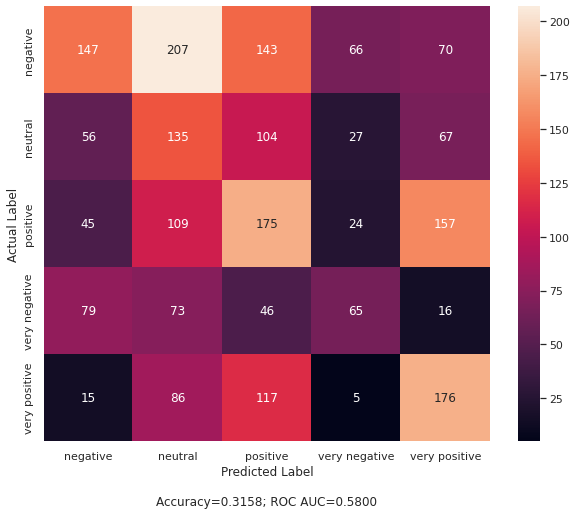

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score


TEST_LABEL = test_data['label_text'].to_list()
PREDICTED_LABEL = test_data['vader_pred_cat'].to_list()
TEST_LABEL_ONE_HOT = labels
PREDICTED_LABEL_ONE_HOT = one_hot_label


labels = list(labelBinary.classes_)

accuracy = accuracy_score(TEST_LABEL, PREDICTED_LABEL)
roc_score = roc_auc_score(PREDICTED_LABEL_ONE_HOT, TEST_LABEL_ONE_HOT)

conf_mat = confusion_matrix(TEST_LABEL, PREDICTED_LABEL)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label\n\nAccuracy={:0.4f}; ROC AUC={:0.4f}'.format(accuracy, roc_score))
plt.show()

In [ ]:
print(classification_report(TEST_LABEL, PREDICTED_LABEL, target_names=labels))

               precision    recall  f1-score   support

     negative       0.43      0.23      0.30       633
      neutral       0.22      0.35      0.27       389
     positive       0.30      0.34      0.32       510
very negative       0.35      0.23      0.28       279
very positive       0.36      0.44      0.40       399

     accuracy                           0.32      2210
    macro avg       0.33      0.32      0.31      2210
 weighted avg       0.34      0.32      0.31      2210



## Embedding Based Models

### Fasttext

In [ ]:
! pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fasttext

In [ ]:
'''
In order to train and evaluate FastText classifier, we’ll have to prepare our data in a format fastText expects.

fastText expects the category first, with the prefix ‘__label__’ before each category, and then the input text, like so,

__label__positive I really enjoyed this restaurant. Would love to visit again.

'''

'\nIn order to train and evaluate FastText classifier, we’ll have to prepare our data in a format fastText expects.\n\nfastText expects the category first, with the prefix ‘__label__’ before each category, and then the input text, like so,\n\n__label__positive I really enjoyed this restaurant. Would love to visit again.\n\n'

In [ ]:
fast_train = train_data[['text', 'label_text']]
fast_test = test_data[['text', 'label_text']]
fast_validation = validation_data[['text', 'label_text']]

In [ ]:
# Prefixing each row of the category column with '__label__'
fast_train.iloc[:, 1] = fast_train.iloc[:, 1].apply(lambda x: '__label__' + x)
fast_test.iloc[:, 1] = fast_test.iloc[:, 1].apply(lambda x: '__label__' + x)
fast_validation.iloc[:, 1] = fast_validation.iloc[:, 1].apply(lambda x: '__label__' + x)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [ ]:
fast_train.label_text.replace('\s+', '_',regex=True,inplace=True)
fast_test.label_text.replace('\s+', '_',regex=True,inplace=True)
fast_validation.label_text.replace('\s+', '_',regex=True,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
fast_train.head(10)

,text,label_text
0,"a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films",__label__very_positive
1,apparently reassembled from the cutting-room floor of any given daytime soap .,__label__negative
2,"they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes .",__label__negative
3,the entire movie is filled with deja vu moments .,__label__neutral
4,"this is a visually stunning rumination on love , memory , history and the war between art and commerce .",__label__positive
5,"um , no. .",__label__neutral
6,jonathan parker 's bartleby should have been the be-all-end-all of the modern-office anomie films .,__label__positive
7,campanella gets the tone just right -- funny in the middle of sad in the middle of hopeful .,__label__positive
8,a fan film that for the uninitiated plays better on video with the sound turned down .,__label__negative
9,"béart and berling are both superb , while huppert ... is magnificent .",__label__very_positive


In [ ]:
import csv

In [ ]:
# Saving the CSV file as a text file to train/validate/test the classifier
fast_train[['label_text', 'text']].to_csv('train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

fast_test[['label_text', 'text']].to_csv('test.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")

fast_validation[['label_text', 'text']].to_csv('validation.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")

In [ ]:
model = fasttext.train_supervised(input='/content/train.txt', autotuneValidationFile='/content/validation.txt', autotuneDuration=180)

In [ ]:
model.test("/content/test.txt")

(2210, 0.4090497737556561, 0.4090497737556561)

In [ ]:
fast_test.iloc[2,0]

"` how many more voyages can this limping but dearly-loved franchise survive ? '"

In [ ]:
model.predict(fast_test.iloc[2,0])  # cat, probability

(('__label__neutral',), array([0.73813295]))

In [ ]:
model.predict(fast_test.iloc[2,0])[0][0]

'__label__neutral'

In [ ]:
def fast_text_category(text):
    return model.predict(text)[0][0]

In [ ]:
fast_test['fasttext_pred'] = fast_test['text'].apply(fast_text_category)

In [ ]:
fast_test

,text,label_text,fasttext_pred
0,"no movement , no yuks , not much of anything .",__label__negative,__label__negative
1,"a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crème brûlée .",__label__very_negative,__label__positive
2,` how many more voyages can this limping but dearly-loved franchise survive ? ',__label__neutral,__label__neutral
3,so relentlessly wholesome it made me want to swipe something .,__label__neutral,__label__neutral
4,"gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .",__label__very_negative,__label__neutral
...,...,...,...
2205,"the problem with concept films is that if the concept is a poor one , there 's no saving the movie .",__label__negative,__label__negative
2206,"safe conduct , however ambitious and well-intentioned , fails to hit the entertainment bull 's - eye .",__label__negative,__label__negative
2207,"a film made with as little wit , interest , and professionalism as artistically possible for a slummy hollywood caper flick .",__label__negative,__label__negative
2208,"to enjoy this movie 's sharp dialogue and delightful performance by jolie and burns , you have to gloss over the no sense ending .",__label__neutral,__label__very_positive


In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinary = LabelBinarizer()
 
labels = labelBinary.fit_transform(fast_test['label_text'])

In [ ]:
labelBinary.classes_

array(['__label__negative', '__label__neutral', '__label__positive',
       '__label__very_negative', '__label__very_positive'], dtype='<U22')

In [ ]:
labels

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
one_hot_label = labelBinary.transform(fast_test['fasttext_pred'])

In [ ]:
one_hot_label

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]])

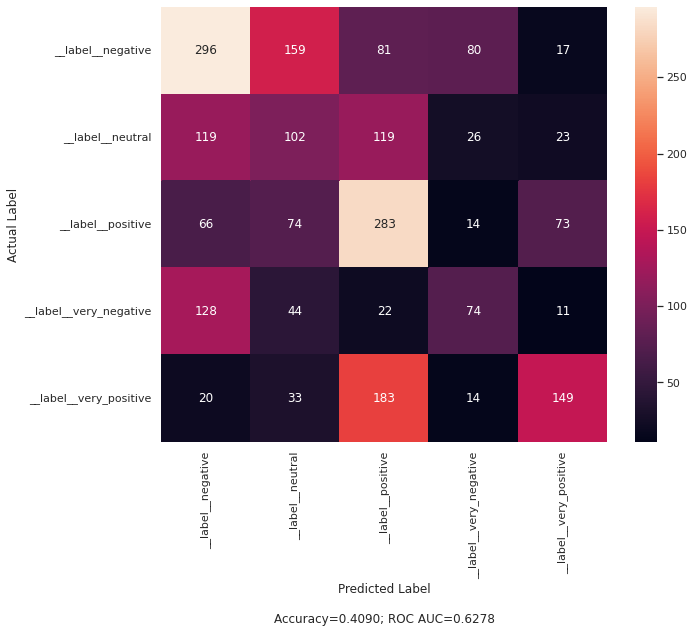

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score


TEST_LABEL = fast_test['label_text'].to_list()
PREDICTED_LABEL = fast_test['fasttext_pred'].to_list()
TEST_LABEL_ONE_HOT = labels
PREDICTED_LABEL_ONE_HOT = one_hot_label


labels = list(labelBinary.classes_)

accuracy = accuracy_score(TEST_LABEL, PREDICTED_LABEL)
roc_score = roc_auc_score(PREDICTED_LABEL_ONE_HOT, TEST_LABEL_ONE_HOT)

conf_mat = confusion_matrix(TEST_LABEL, PREDICTED_LABEL)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label\n\nAccuracy={:0.4f}; ROC AUC={:0.4f}'.format(accuracy, roc_score))
plt.show()

In [ ]:
print(classification_report(TEST_LABEL, PREDICTED_LABEL, target_names=labels))

                        precision    recall  f1-score   support

     __label__negative       0.47      0.47      0.47       633
      __label__neutral       0.25      0.26      0.25       389
     __label__positive       0.41      0.55      0.47       510
__label__very_negative       0.36      0.27      0.30       279
__label__very_positive       0.55      0.37      0.44       399

              accuracy                           0.41      2210
             macro avg       0.41      0.38      0.39      2210
          weighted avg       0.42      0.41      0.41      2210



In [ ]:
fast_test.label_text.value_counts()

__label__negative         633
__label__positive         510
__label__very_positive    399
__label__neutral          389
__label__very_negative    279
Name: label_text, dtype: int64